# Zad 8
Zaimplementuj W tym zadaniu przeprowadź porównanie skuteczności różnych metod grupowania, takich jak K-means, Mean Shift, GMM i DBSCAN, dla danych zawierających informacje medyczne o pacjentach z chorobami serca. Po przeprowadzeniu klastrowania oceniaj jakość
grupowania za pomocą odpowiednich metryk (np. Silhouette Score, Calinski-Harabasz Score,
Davies-Bouldin Score) i zinterpretuj wyniki, wskazując, która metoda najlepiej odzwierciedla
strukturę danych i jest najbardziej użyteczna z punktu widzenia interpretacji medycznych.


In [43]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.mixture import GaussianMixture
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_diabetes
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [44]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.drop(['DEATH_EVENT'], axis=1)
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


C:\Users\jakub\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


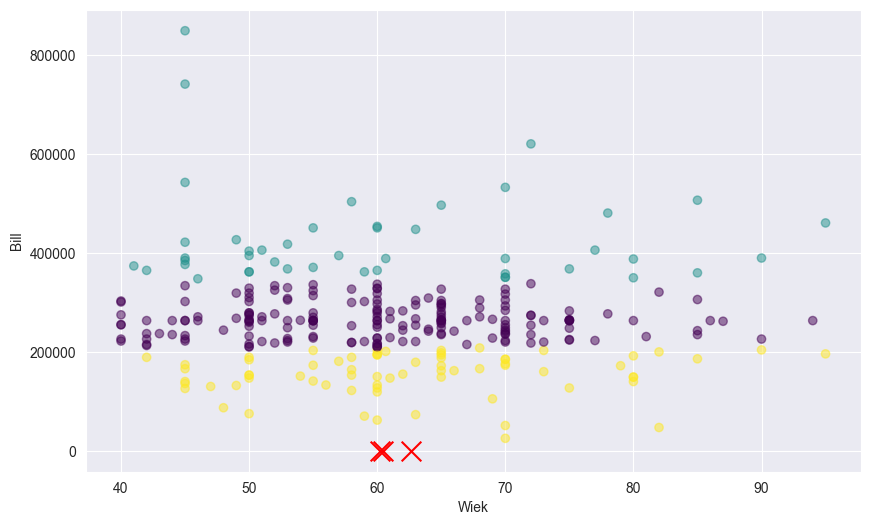

In [45]:
# Inicjalizacja i dopasowanie modelu K-means
k = 3
X = data
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
# Przewidywanie przynależności do klastrów dla każdej próbki
labels = kmeans.labels_
# Wyświetlenie wyników
plt.figure(figsize=(10, 6))
plt.scatter(X['age'], X['platelets'], c=labels, cmap='viridis', alpha=0.5)
plt.xlabel("Wiek")
plt.ylabel("Bill")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red')
plt.show()

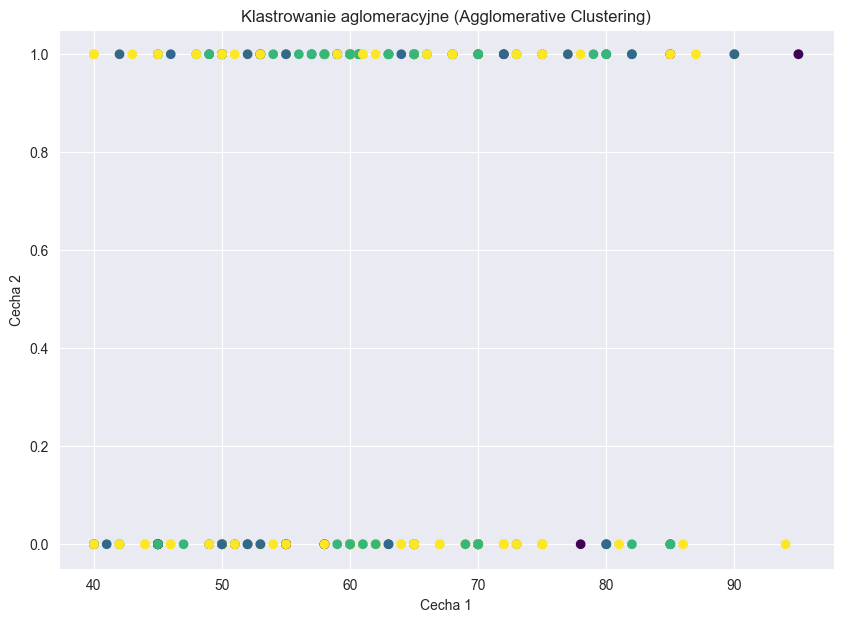

In [46]:
# Implementacja klastrowania aglomeracyjnego
X = np.array(data)
ac = AgglomerativeClustering(n_clusters=4)
ac.fit(X)
# Zwizualizowanie wyników
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c= ac.labels_, cmap='viridis')
plt.title('Klastrowanie aglomeracyjne (Agglomerative Clustering)')
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.show()

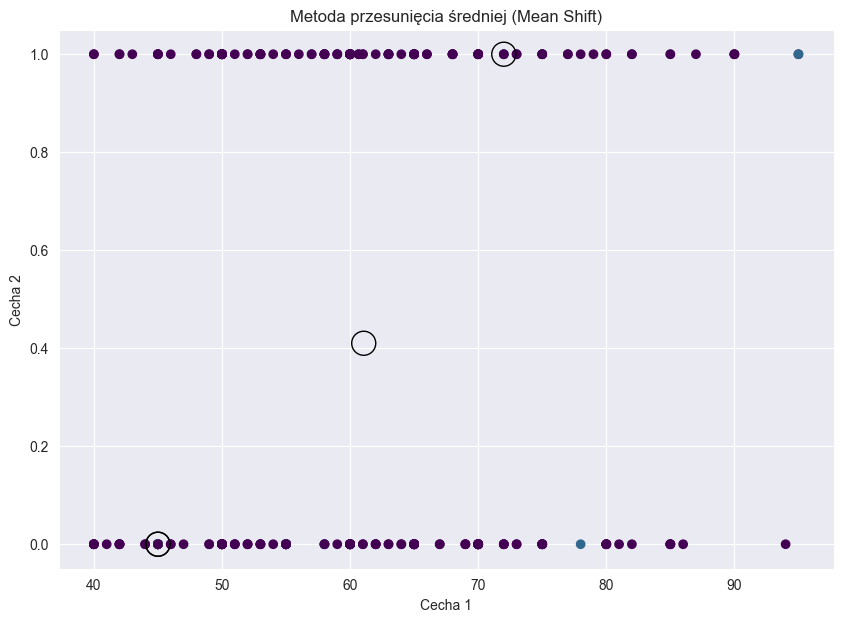

In [47]:
# Implementacja metody Mean Shift
X = np.array(data)
ms = MeanShift()
ms.fit(X)
cluster_centers = ms.cluster_centers_

# Zwizualizowanie wyników
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=ms.labels_, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', s=300,
 edgecolor='k', facecolor='none')
plt.title('Metoda przesunięcia średniej (Mean Shift)')
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.show()

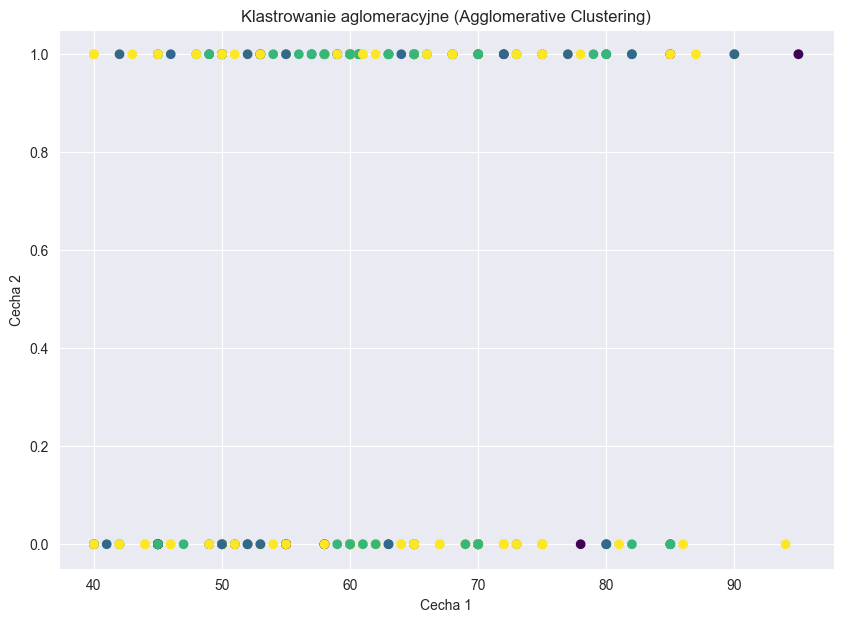

In [48]:
# Implementacja klastrowania aglomeracyjnego
X = np.array(data)
ac = AgglomerativeClustering(n_clusters=4)
ac.fit(X)
# Zwizualizowanie wyników
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c= ac.labels_, cmap='viridis')
plt.title('Klastrowanie aglomeracyjne (Agglomerative Clustering)')
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.show()

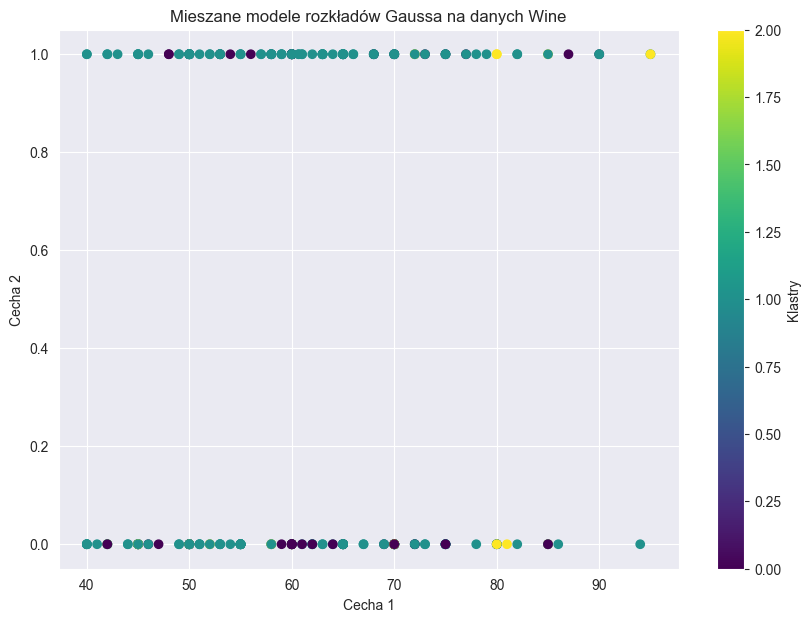

In [49]:
# Mieszanka gaussa
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
labels = gmm.predict(X)
# Zwizualizowanie wyników
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Mieszane modele rozkładów Gaussa na danych Wine')
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.colorbar(label='Klastry')
plt.show()

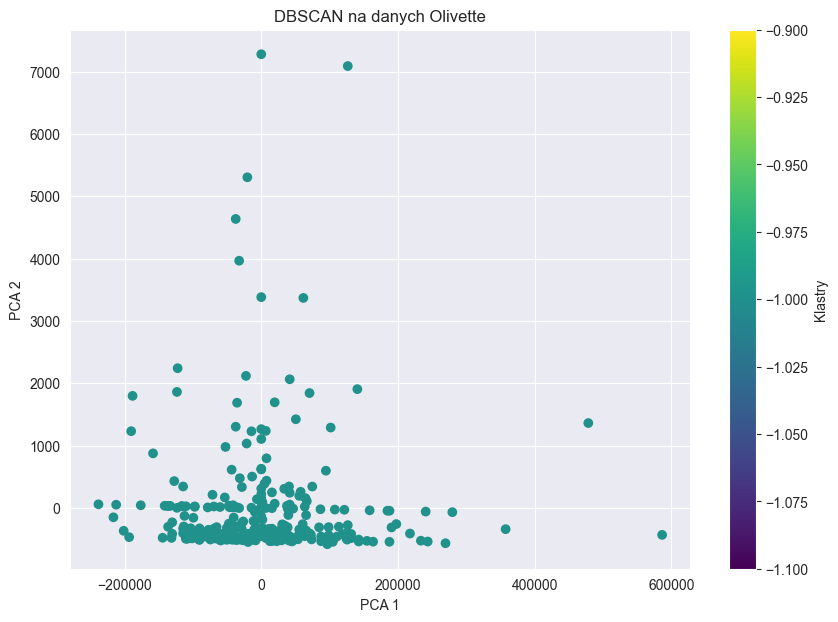

In [51]:
# Implementacja DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X)
# Redukcja wymiarów do wizualizacji
pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)
# Zwizualizowanie wyników
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('DBSCAN na danych Olivette')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Klastry')
plt.show()